Chapter 10
# 等高线颗粒度
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
# 导入符号变量

from matplotlib import cm
# 导入色谱模块

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数

# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

### 颗粒度过低

In [3]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

In [4]:
xx, yy = mesh(num = 7)
ff = f_xy_fcn(xx,yy)

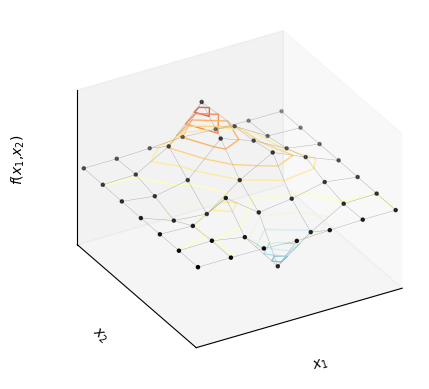

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})


ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=1, cstride=1,
                  linewidth = 0.25)

ax.scatter(xx,yy, ff,
                  marker = '.', color = 'k')

CS = ax.contour(xx, yy, ff,
           levels = np.linspace(-8,8,17),
           cmap = 'RdYlBu_r',
           linewidths = 1)

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/颗粒度过低，三维.svg', format='svg')

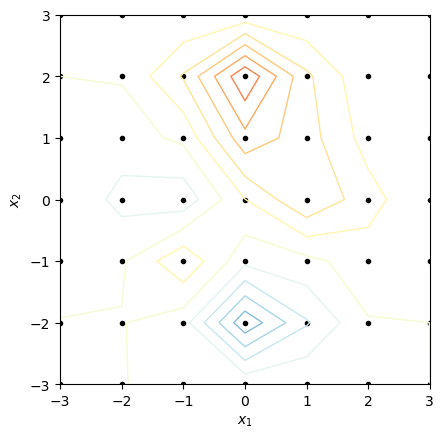

In [5]:
fig, ax = plt.subplots()

ax.scatter(xx, yy, marker = '.', color = 'k')
CS = ax.contour(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r',
           linewidths = 1)
# fig.colorbar(CS)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/颗粒度过低，平面.svg', format='svg')

### 颗粒度合理

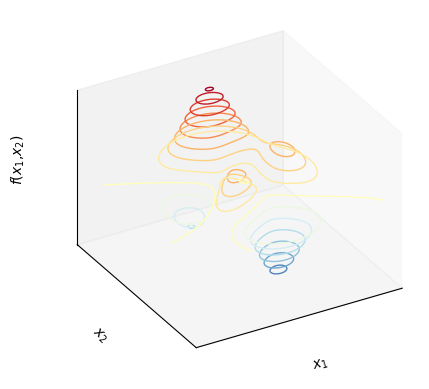

In [9]:
xx, yy = mesh(num = 6*50 + 1)
ff = f_xy_fcn(xx,yy)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})


# ax.plot_wireframe(xx,yy, ff,
#                   color = [0.6, 0.6, 0.6],
#                   rstride=10, cstride=10,
#                   linewidth = 0.25)

# ax.scatter(xx,yy, ff,marker = '.', color = 'k')

CS = ax.contour(xx, yy, ff,
           levels = np.linspace(-8,8,17),
           cmap = 'RdYlBu_r',
           linewidths = 1)

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/颗粒度合理.svg', format='svg')

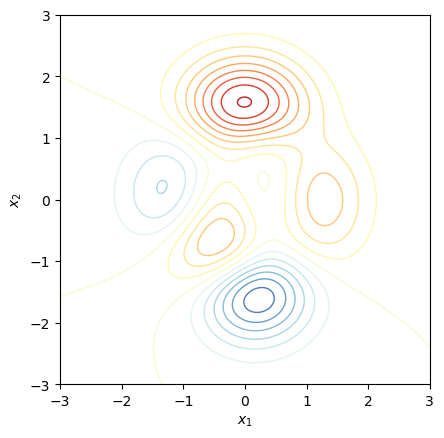

In [8]:
fig, ax = plt.subplots()

# ax.scatter(xx, yy, marker = '.', color = 'k')
CS = ax.contour(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r',
           linewidths = 1)
# fig.colorbar(CS)

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/颗粒度合理，平面.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023